
<center> <h1> <strong>Healthcare Analysis: Exploring Patient Data and Identifying the Trends in Health Outcomes and Treatment Effectiveness</strong></h1></center>
--- Khushi Kakani, Sahitya Satyendra Gupta, Rishiraj Roy

---

### **Dataset Description**
This dataset contains information about patients admitted to a hospital, including demographic details, medical conditions, treatments, and billing information. The dataset comprises the following columns:

1. Name: Names of the patients admitted to the hospital.
2. Age: Age of the patients at the time of admission.
3. Gender: Gender of the patients (e.g., male, female).
4. Blood Type: Blood type of the patients.
5. Medical Condition: Description of the medical condition or diagnosis for which the patient is admitted.
6. Date of Admission: Date when the patient was admitted to the hospital.
7. Doctor: Name or identifier of the doctor responsible for the patient's care.
8. Hospital: Name or identifier of the hospital where the patient is admitted.
9. Insurance Provider: Name of the insurance provider covering the patient's medical expenses.
10. Billing Amount: Amount billed to the patient or their insurance provider for medical services received during the hospital stay.
11. Room Number: Identifier of the room where the patient is accommodated.
12. Admission Type: Type of admission, such as emergency, elective, or transfer.
13. Discharge Date: Date when the patient was discharged from the hospital.
14. Medication: List of medications prescribed to the patient during their hospitalization.
15. Test Results: Results of medical tests conducted on the patient during their hospital stay.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv(r"https://raw.githubusercontent.com/St-Xavier-s-College-Mumbai/project-30-marks-group-11-keyboard-crackers/refs/heads/main/healthcare_dataset.csv")

In [31]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [32]:
df.shape

(55500, 15)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [34]:
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [35]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission']).dt.date.astype('datetime64[ns]')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date']).dt.date.astype('datetime64[ns]')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

No missing values so nothing to clean

In [37]:
df['Name'] = df['Name'].str.title()

In [38]:
df.Name

,Name
0,Bobby Jackson
1,Leslie Terry
2,Danny Smith
3,Andrew Watts
4,Adrienne Bell
...,...
55495,Elizabeth Jackson
55496,Kyle Perez
55497,Heather Wang
55498,Jennifer Jones


In [39]:
df.Name.value_counts().sum()

55500

# **Exploratory Data Analysis**

In [40]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.000000,55500,55500.000000,55500.000000,55500
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.602454,NaN,14211.454431,115.243069,NaN


In [41]:
df.describe(include='object').T

,count,unique,top,freq
Name,55500,40235,Michael Williams,24
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Medication,55500,5,Lipitor,11140
Test Results,55500,3,Abnormal,18627


### **Observations:**

1. **Patient Age Range:**
  - Patients' age range from 13 to 89 years, with an average age of approximately 52 years.

2. **Hospital Room Capacity:**
  - The hospital offers a range of rooms, from 101 to 500, ensuring flexibility in patient accommodation.

3. **Temporal Coverage:**
  - Data spans from May 8, 2019, to May 7, 2024, providing a comprehensive five-year view of patient admissions.

4. **Admission Types:**
  - Patients enter the hospital through three main admission routes:
    - Emergency
    - Elective
    - Transfer

5. **Blood Type Distribution:**
  - Patients exhibit various blood types, with A- being the most prevalent.

6. **Hospital Distribution:**
  - The dataset encompasses admissions from 44 hospitals, with LLC Smith being the most frequent.

7. **Doctor Distribution:**
  - Among the 27 doctors recorded in the dataset, Michael Smith attends to the highest number of patients.

In [42]:
df.Gender.value_counts()

,count
Gender,
Male,27774
Female,27726


In [43]:
# Gender in percentage
100*df.Gender.value_counts()/df.shape[0]

,count
Gender,
Male,50.043243
Female,49.956757


In [44]:
df['Blood Type'].value_counts()

,count
Blood Type,
A-,6969
A+,6956
AB+,6947
AB-,6945
B+,6945
B-,6944
O+,6917
O-,6877


In [45]:
df['Admission Type'].value_counts()

,count
Admission Type,
Elective,18655
Urgent,18576
Emergency,18269


In [46]:
df['Test Results'].value_counts()

,count
Test Results,
Abnormal,18627
Normal,18517
Inconclusive,18356


In [47]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [48]:
labels = ["{0} - {1}".format(i, i + 10) for i in range(10, 90, 10)]

df['Age_group'] = pd.cut(df.Age, range(10, 100, 10), right=False, labels=labels)

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age_group
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,30 - 40
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,60 - 70
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,70 - 80
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,20 - 30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,40 - 50


In [49]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age_group
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,40 - 50
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,60 - 70
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,30 - 40
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,40 - 50
55499,James Garcia,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal,50 - 60


# Vizualizations

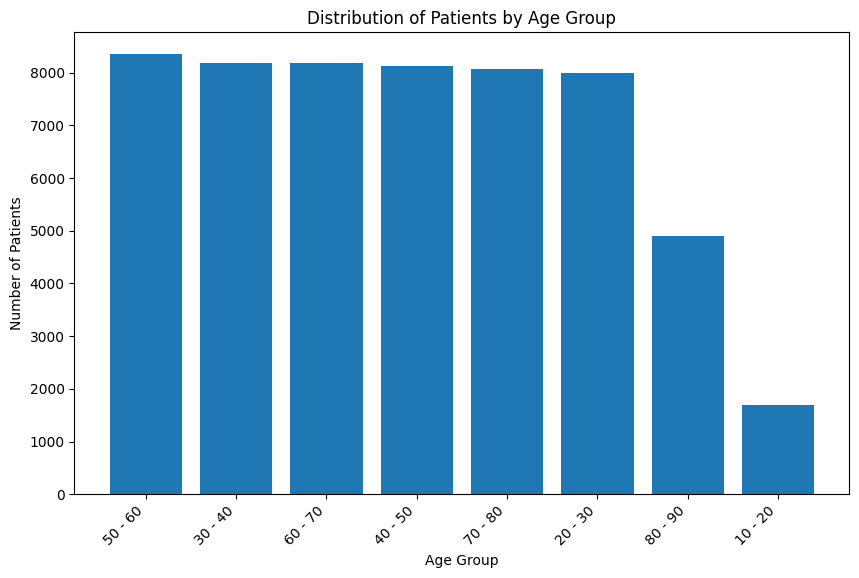

In [50]:
age_group_counts = df['Age_group'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients by Age Group')
plt.xticks(rotation=45, ha='right')
plt.show()


In [51]:
object_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Insurance Provider', "Medication", 'Test Results']

# Define pastel color palette
pastel_palette = px.colors.qualitative.Pastel

# Plotly plots for object-type columns
for col in object_columns:
    fig = go.Figure()
    for i, (category, count) in enumerate(df[col].value_counts().items()):
        fig.add_trace(go.Bar(x=[col], y=[count], name=category, marker_color=pastel_palette[i]))
    fig.update_layout(title=f'Distribution of {col}', xaxis_title=col, yaxis_title='Count')
    fig.show()

In [53]:
# Group 'Age' by 'Medical Condition' and calculate the mean age for each condition
age_by_condition = df.groupby('Medical Condition')['Age'].mean().reset_index()

# Plot using Plotly Express with different color palettes
fig = px.bar(age_by_condition, x='Medical Condition', y='Age', color='Medical Condition',
             title='Average Age by Medical Condition',
             labels={'Age': 'Average Age', 'Medical Condition': 'Medical Condition'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [54]:
# Group by 'Medical Condition' and 'Medication' and calculate the count for each combination
grouped_df = df.groupby(['Medical Condition', 'Medication']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Medical Condition', y='Count', color='Medication', barmode='group',
             title='Medication Distribution by Medical Condition',
             labels={'Count': 'Count', 'Medical Condition': 'Medical Condition', 'Medication': 'Medication'})
fig.show()

In [55]:
# Group 'Sex' by 'Medical Condition' and calculate the count for each combination
sex_by_condition = df.groupby(['Medical Condition', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express with different color palettes
fig = px.bar(sex_by_condition, x='Medical Condition', y='Count', color='Gender',
             title='Patient Count by Gender and Medical Condition',
             labels={'Count': 'Patient Count', 'Medical Condition': 'Medical Condition', 'Gender': 'Gender'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [56]:
# Group by 'Blood Type' and 'Medical Condition' and calculate the count for each combination
grouped_df = df.groupby(['Blood Type', 'Medical Condition']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Blood Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Blood Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Medical Condition': 'Medical Condition'})
fig.show()

In [57]:
# Group by 'Blood Type' and 'Gender' and calculate the count for each combination
grouped_df = df.groupby(['Blood Type', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Blood Type', y='Count', color='Gender', barmode='group',
             title='Patient Count by Blood Type and Gender',
             labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Gender': 'Gender'})
fig.show()

In [58]:
# Group by 'Admission Type' and 'Gender' and calculate the count for each combination
grouped_df = df.groupby(['Admission Type', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Admission Type', y='Count', color='Gender', barmode='group',
             title='Patient Count by Admission Type and Gender',
             labels={'Count': 'Patient Count', 'Admission Type': 'Admission Type', 'Gender': 'Gender'})
fig.show()

In [59]:
# Group by 'Admission Type' and 'Medical Condition' and calculate the count for each combination
grouped_df = df.groupby(['Admission Type', 'Medical Condition']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Admission Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Admission Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Admission Type': 'Admission Type', 'Medical Condition': 'Medical Condition'})
fig.show()

In [60]:
# Group by 'Test Results' and 'Admission Type' and calculate the count for each combination
grouped_df = df.groupby(['Test Results', 'Admission Type']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Test Results', y='Count', color='Admission Type', barmode='group',
             title='Test Results Distribution by Admission Type',
             labels={'Count': 'Count', 'Test Results': 'Test Results', 'Admission Type': 'Admission Type'})
fig.show()


**Questions from the data:**

- What is the most common blood type among the patients?


In [61]:
most_common_blood_type = df['Blood Type'].value_counts().idxmax()
print(f"The most common blood type among the patients is {most_common_blood_type}.")

The most common blood type among the patients is A-.


- How many unique hospitals are included in the dataset?

In [62]:
unique_hospitals = df['Hospital'].nunique()
print(f"There are {unique_hospitals} unique hospitals included in the dataset.")

There are 39876 unique hospitals included in the dataset.


- Who is the oldest patient in the dataset, and what is their age?

In [63]:
oldest_patient_age = df['Age'].max()
oldest_patient_name = df[df['Age'] == oldest_patient_age]['Name'].iloc[0]
print(f"The oldest patient in the dataset is {oldest_patient_name} with an age of {oldest_patient_age} years.")

The oldest patient in the dataset is David Newton with an age of 89 years.


- Which doctor has treated the highest number of patients?

In [64]:
doctor_highest_patient_count = df['Doctor'].value_counts().idxmax()
print(f"The doctor who has treated the highest number of patients is {doctor_highest_patient_count}.")

The doctor who has treated the highest number of patients is Michael Smith.


- What is the most frequently prescribed medication?

In [65]:
most_frequent_medication = df['Medication'].value_counts().idxmax()
print(f"The most frequently prescribed medication is {most_frequent_medication}.")

The most frequently prescribed medication is Lipitor.


- Are there any seasonal trends in hospital admissions?

In [66]:
# Calculate monthly admissions
monthly_admissions = df['Date of Admission'].dt.month.value_counts().sort_index()

# Create a DataFrame
monthly_admissions_df = pd.DataFrame({'Month': monthly_admissions.index, 'Admissions': monthly_admissions.values})

# Plot the trend using Plotly Express
fig = px.line(monthly_admissions_df, x='Month', y='Admissions', title='Monthly Admissions Trend')
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Number of Admissions')
fig.show()

- What is the average billing amount for patients?

In [67]:
average_billing_amount = df['Billing Amount'].mean()
print(f"The average billing amount for patients is ${average_billing_amount:.2f}.")

The average billing amount for patients is $25539.32.


- How many male and female patients are there?

In [68]:
male_patients = df[df['Gender'] == 'Male'].shape[0]
female_patients = df[df['Gender'] == 'Female'].shape[0]
print(f"There are {male_patients} Male patients and {female_patients} Female patients.")

There are 27774 Male patients and 27726 Female patients.


- What are the top three most common medical conditions for which patients are admitted?


In [72]:
top_three_medical_conditions = df['Medical Condition'].value_counts().head(3)
print("Top Three Most Common Medical Conditions:")
print("-"*40)
print(top_three_medical_conditions)

Top Three Most Common Medical Conditions:
----------------------------------------
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Name: count, dtype: int64
